In [1]:
import os, sys
import subprocess as sp

# add custom modules and astro data path 
pp = '../nav_tools/'
sys.path.append(pp)

# needed by basemap
os.environ['PROJ_LIB'] = '/opt/miniconda3/envs/astrolab/share/proj'

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams.update({'font.size': 7})

import celestialdata as cdata
import navigationalstars as ns
import navtools as nt

In [3]:
def findVisibleStars(date, time, pos, h0, h1, ns_db):
    
    t = [date[2],date[1],date[0],time[0],time[1],time[2]]
    star_ids = ns_db.keys()
    
    vs = []
    for s_id in star_ids:
        sdd = cd.get_star_data(s_id,t)
        saz = cd.get_star_altaz(s_id,t,pos)
        if saz['alt'] > h0 and saz['alt'] < h1:
            s_name = ns_db[s_id][0]
            vs.append({'name':s_name, 'alt':saz['alt'], 'az':saz['az'], 'dec':sdd['dec'], 'sha':sdd['sha'], 'sha':sdd['sha']})
    
    return vs

In [4]:
def generateLatexInput(date,time,pos,stars,gha_a,obs_h,h0,h1):
    
    fo = open('body.tex','w')
    
    str_fi = r"$\varphi={:02d}^\circ \, {:04.1f}' \, \mathrm{{{:s}}}$".format(pos[0][0],pos[0][1],pos[0][2])
    str_la = r"$\lambda={:03d}^\circ \, {:04.1f}' \, \mathrm{{{:s}}}$".format(pos[1][0],pos[1][1],pos[1][2])
    
    fo.write(r'\textbf{{Position}}: {:s}, {:s}\\[2mm]'.format(str_fi, str_la)); fo.write('\n')
    fo.write(r'\textbf{{Date}} ({{\footnotesize dd/mm/yyyy}}): {:02d}/{:02d}/{:04d}\\[2mm]'.format(date[0],date[1],date[2])); fo.write('\n')
    fo.write(r'\textbf{{Time}}: {:02d}:{:02d}:{:02d}\\[2mm]'.format(time[0],time[1],time[2])); fo.write('\n')
    
    gha_a_dm = nt.dd2dms(gha_a)
    str_gha_a = r"${:02d}^\circ \, {:04.1f}'$".format(int(gha_a_dm[0]), gha_a_dm[1])
    fo.write(r'$\textbf{{\textsc{{Gha}}}}_{{\aries}}:$ {:s}\\[2mm]'.format(str_gha_a)); fo.write('\n')
    fo.write(r'\textbf{{Observer height}}: {:04.1f}$\,$m\\[2mm]'.format(obs_h)); fo.write('\n')
    fo.write(r'\textbf{{Altitude limit}}: $h_{{\mathrm{{min}}}}={:02d}^\circ$; $h_{{\mathrm{{\max}}}}={:02d}^\circ$\\'.format(int(h0),int(h1))); fo.write('\n')
    
    fo.write(r'\begin{center}'); fo.write('\n')
    fo.write(r'   \includegraphics[width=16cm]{visible_stars.pdf}'); fo.write('\n')
    fo.write(r'\end{center}'); fo.write('\n')
    
    fo.write(r'\vspace{5mm}'); fo.write('\n')
    fo.write(r'\begin{center}'); fo.write('\n')
    fo.write(r'\footnotesize'); fo.write('\n')
    fo.write(r'\begin{tabular}{l l r r r r}\hline'); fo.write('\n')
    fo.write(r' \multicolumn{1}{c}{\#} & \multicolumn{1}{c}{Name} & \multicolumn{1}{c}{$h$} & \multicolumn{1}{c}{$\omega$} & \multicolumn{1}{c}{$\delta$} & \multicolumn{1}{c}{\textsc{Sha}}\\ \hline'); fo.write('\n')
    i = 1
    for star in stars:
        h_dm = nt.dd2dms(star['alt'])
        str_h = r"${:02d}^\circ \, {:04.1f}'$".format(int(h_dm[0]), h_dm[1])
        str_w = r'${:05.1f}^\circ$'.format(star['az'])
        dec_dm = nt.dd2dms(star['dec'])
        if star['dec'] < 0:
            str_dec = r"${:02d}^\circ \, {:04.1f}' \, \mathrm{{S}}$".format(int(np.abs(dec_dm[0])), dec_dm[1])
        else:
            str_dec = r"${:02d}^\circ \, {:04.1f}' \, \mathrm{{N}}$".format(int(np.abs(dec_dm[0])), dec_dm[1])
        sha_dm = nt.dd2dms(star['sha'])
        str_sha = r"${:02d}^\circ \, {:04.1f}'$".format(int(sha_dm[0]), sha_dm[1])
        fo.write(r'   {:02d} & {:s} & {:s} & {:s} & {:s} & {:s}\\'.format(i, star['name'], str_h, str_w, str_dec, str_sha)); fo.write('\n')
        
        i += 1
    fo.write(r'\hline'); fo.write('\n')
    fo.write(r'\end{tabular}'); fo.write('\n')
    fo.write(r'\end{center}'); fo.write('\n')
    
    fo.close()
    
    # run latex compile and clean
    p = sp.Popen(['xelatex','today_stars.tex'], stdout = sp.PIPE)
    p.wait()

01 - Kochab       h = 38°23.84′  ω = 018.93°
02 - Dubhe        h = 55°02.32′  ω = 043.25°
03 - Alioth       h = 39°57.69′  ω = 046.67°
04 - Alkaid       h = 29°35.05′  ω = 048.28°
05 - Denebola     h = 26°14.40′  ω = 096.37°
06 - Regulus      h = 40°48.94′  ω = 120.38°
07 - Alphard      h = 28°17.21′  ω = 143.94°
08 - Pollux       h = 71°14.44′  ω = 162.97°
09 - Procyon      h = 48°52.54′  ω = 173.07°
10 - Sirius       h = 26°37.41′  ω = 189.66°
11 - Betelgeuse   h = 47°07.67′  ω = 212.21°
12 - Alnilam      h = 37°22.25′  ω = 213.75°
13 - Rigel        h = 28°48.00′  ω = 216.34°
14 - Bellatrix    h = 43°03.80′  ω = 221.21°
15 - Elnath       h = 61°34.53′  ω = 242.06°
16 - Aldebaran    h = 44°49.63′  ω = 243.02°
17 - Menkar       h = 20°22.08′  ω = 254.10°
18 - Hamal        h = 24°32.42′  ω = 279.16°
19 - Capella      h = 68°38.83′  ω = 281.07°
20 - Mirfak       h = 51°20.12′  ω = 297.90°
21 - Schedar      h = 32°20.64′  ω = 320.17°
22 - Polaris      h = 46°21.48′  ω = 359.15°


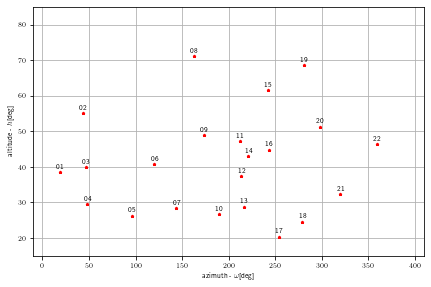

In [7]:
cd = cdata.CelestialData(pp)
ns_db = cd.get_nav_stars_db()

date = [26,2,2021]
time = [20,0,0]
fi = [46,6.08,'N']
la = [13,38.85,'E']
h = 20.0
pos = [nt.nav2dd(fi), nt.nav2dd(la), h]

h0 = 20.0
h1 = 80.0
stars_vis = findVisibleStars(date, time, pos, h0, h1, ns_db)
stars_vis.sort(key=lambda k : k['az'])

i = 1
data = []
for star in stars_vis:
    print('{:02d} - {:11s}  h = {:s}  {:s} = {:s}'.format(i,star['name'],nt.prettyPrintAlt(star['alt']), nt.u_omega, nt.prettyPrintAz(star['az'])))
    data.append([star['az'],star['alt']])
    i += 1
    
data = np.array(data)

fig, ax = mpl.subplots()
i = 1
for da in data:
    ax.plot(da[0], da[1], marker='*', markersize=3, color='red')
    ax.text(da[0]-4, da[1]+1, '{:02d}'.format(i))
    i += 1
ax.grid()
ax.set_xlabel('azimuth - $\omega$[deg]')
ax.set_ylabel('altitude - $h$[deg]')
ax.set_xlim([-10, 410])
ax.set_ylim([h0-5, h1+5])
fig.tight_layout()
fig.savefig('visible_stars.pdf')

In [8]:
# generate latex document
t = [date[2],date[1],date[0],time[0],time[1],time[2]]
gha_a = cd.get_aries_gha(t)

generateLatexInput(date,time,[fi,la],stars_vis,gha_a,h,h0,h1)
os.system("rm -rf body.tex visible_stars.pdf *.aux *.out *.log")

0